# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

In [1]:
# autopct 지정할때 포맷 형식 
a = 10 
b = 5.23
print(f'{a}, {b}')
print('{}, {}'.format(a,b))
print('%d, %.2f' %(a, b))

10, 5.23
10, 5.23
10, 5.23


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

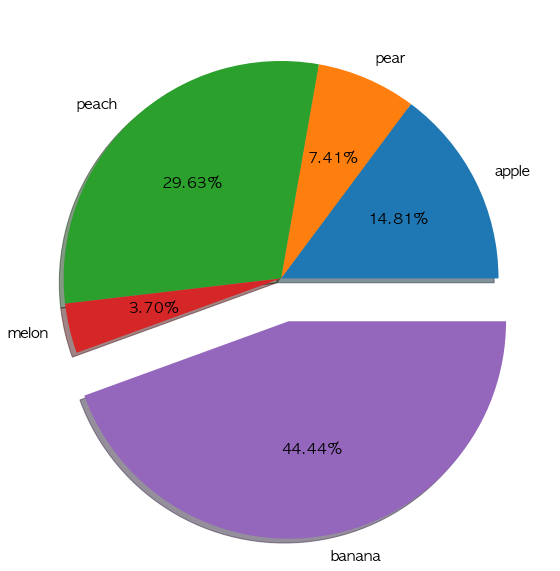

In [3]:
labels = ['apple', 'pear','peach','melon', 'banana']
amount = [20, 10, 40, 5, 60]

plt.figure(figsize = (10,10))
plt.pie(amount, labels = labels, autopct = '%.2f%%', 
        explode = [0, 0, 0, 0, 0.2], shadow = True, # explode : 띄우기 간격 0.2 로 줌 , 강조하고 싶을 때 처리  
        textprops = {'fontsize' : 15} # 폰트사이즈 늘리기 
) 

plt.show()

# =====7교시 =====

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('data/webbrowser_share.xls')
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12 non-null     float64
 1   Chrome            12 non-null     float64
 2   IE                12 non-null     float64
 3   Edge              12 non-null     float64
 4   Safari            12 non-null     float64
 5   Whale Browser     12 non-null     float64
 6   Firefox           12 non-null     float64
 7   Opera             12 non-null     float64
 8   Swing             12 non-null     float64
 9   Phantom           12 non-null     float64
 10  UC Browser        12 non-null     float64
 11  Chromium          12 non-null     float64
 12  QQ Browser        12 non-null     float64
 13  Vivaldi           12 non-null     float64
 14  360 Safe Browser  12 non-null     float64
 15  Maxthon           12 non-null     float64
 16  Coc Coc           12 non-null     float64
 17 

,date,Chrome,IE,Edge,Safari,Whale Browser,Firefox,Opera,Swing,Phantom,...,QQ Browser,Vivaldi,360 Safe Browser,Maxthon,Coc Coc,Puffin,Yandex Browser,Sogou Explorer,Mozilla,Whale
0,2018.08,59.12,31.06,2.97,2.52,1.36,1.26,0.88,0.39,0.25,...,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.0
1,2018.09,61.95,27.84,3.16,2.19,1.27,2.57,0.40,0.37,0.00,...,0.03,0.02,0.06,0.02,0.00,0.00,0.02,0.03,0.00,0.0
2,2018.10,62.05,28.36,3.35,2.43,1.28,1.36,0.59,0.35,0.00,...,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.03,0.01,0.0
3,2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.55,0.26,0.00,...,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.02,0.01,0.0
4,2018.12,68.34,22.31,2.99,2.02,1.11,2.04,0.63,0.25,0.00,...,0.04,0.01,0.02,0.02,0.03,0.01,0.04,0.02,0.00,0.0


- date : float 타입에서 object 타입으로 변경 
    - 방법 1 : astype
    - 방법 2 : 읽어올때 타입변경

In [6]:
# df['date'] = df['date'].astype('object') # 방법 1 
df = pd.read_excel('data/webbrowser_share.xls', converters = {'date' : np.str}) # 방법2 : 읽어올때 타입변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12 non-null     object 
 1   Chrome            12 non-null     float64
 2   IE                12 non-null     float64
 3   Edge              12 non-null     float64
 4   Safari            12 non-null     float64
 5   Whale Browser     12 non-null     float64
 6   Firefox           12 non-null     float64
 7   Opera             12 non-null     float64
 8   Swing             12 non-null     float64
 9   Phantom           12 non-null     float64
 10  UC Browser        12 non-null     float64
 11  Chromium          12 non-null     float64
 12  QQ Browser        12 non-null     float64
 13  Vivaldi           12 non-null     float64
 14  360 Safe Browser  12 non-null     float64
 15  Maxthon           12 non-null     float64
 16  Coc Coc           12 non-null     float64
 17 

- date를 인덱스로 빼주자 

In [7]:
df.set_index('date', inplace = True)
df.head()

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,Opera,Swing,Phantom,UC Browser,...,QQ Browser,Vivaldi,360 Safe Browser,Maxthon,Coc Coc,Puffin,Yandex Browser,Sogou Explorer,Mozilla,Whale
date,,,,,,,,,,,,,,,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,0.88,0.39,0.25,0.03,...,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.0
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,0.40,0.37,0.00,0.03,...,0.03,0.02,0.06,0.02,0.00,0.00,0.02,0.03,0.00,0.0
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,0.59,0.35,0.00,0.03,...,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.03,0.01,0.0
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.55,0.26,0.00,0.02,...,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.02,0.01,0.0
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,0.63,0.25,0.00,0.03,...,0.04,0.01,0.02,0.02,0.03,0.01,0.04,0.02,0.00,0.0


- 앞에 몇개를 제외하고 나머지 브라우저는 값이 너무 작아 의미가 없다. 
- 점유율은 큰 몇개는 두고 나머지들은 기타로 값을 합쳐보자. 
- 행별로 다 더하고 -> 기타브라우저 컬럼을 만들자
- 오페라(6번) 부터 합쳐보자
- 기존 5번컬럼까지 이랑 합쳐서 새롭운 데이터프레임을 만들자

In [8]:
etc = df[df.columns[6:]].sum(axis = 1)

In [9]:
web_df = df[df.columns[:6]].copy()
web_df['ETC'] = etc
web_df

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,ETC
date,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,1.68
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,1.00
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,1.14
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.98
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,1.17
2019.01,70.46,21.05,2.99,2.07,1.14,1.15,1.10
2019.02,70.63,20.71,2.68,2.53,1.22,1.21,1.00
2019.03,63.35,25.42,3.81,3.16,1.65,1.49,1.11
2019.04,63.63,24.65,4.08,3.11,1.64,1.61,1.27


- 자, 이제 데이터프레임은 어느정도 다듬어 졌다. 
- 브라우져별로 점유율을 한번 그려보자 

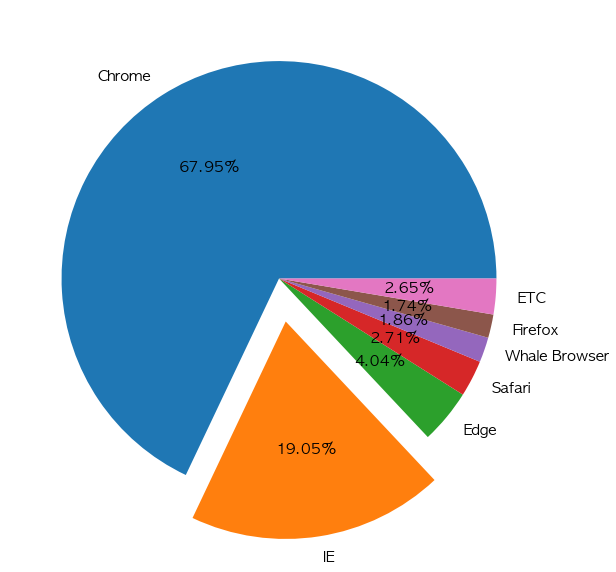

In [10]:
# 2019.07 브라우저 점유율 시각화 
plt.figure(figsize = (10,10))

plt.pie(web_df.loc['2019.07'], 
        labels = web_df.columns,
        autopct = '%.2f%%', 
        textprops = {'fontsize' : 15},
        explode = [0, 0.2, 0, 0, 0, 0, 0])

plt.show()

 # ------ 03.11(목) 2교시부터 

# 5 히스토그램 그리기
## .1 히스토그램
- 표로 된 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 특정 그룹안에 값의 빈도를 나타낸 표
    - 주로 연속형 자료를 특정 구간으로 나눠 그 빈도를 확인한다.
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = np.random.normal(100, 10, 1000) # 평균 : 100, 표준편차 : 10, 개수 :1000 실수 
a = np.unique(data, return_counts = True) # 고유값, 각각의 갯수(수량)
a

(array([ 71.37405696,  71.42497262,  72.24539863,  73.38796809,
         73.72068146,  75.3484313 ,  76.2646984 ,  76.2751304 ,
         77.04895842,  77.56671671,  78.10137068,  78.26729014,
         78.33563739,  78.62384675,  78.77376804,  78.93539138,
         79.37308796,  79.39786273,  79.44807174,  79.76658755,
         80.51636795,  80.7910181 ,  80.8291031 ,  80.9791105 ,
         81.09078845,  81.19085995,  81.22850339,  81.23671071,
         81.61640795,  81.66637036,  81.72265947,  81.7720472 ,
         81.99662602,  82.14104173,  82.16627437,  82.17411399,
         82.27942944,  82.36325429,  82.50177644,  82.52650049,
         82.53340384,  82.67499976,  82.68293611,  82.89996594,
         82.91904352,  82.99271371,  83.01353489,  83.03065637,
         83.06497064,  83.16505232,  83.19012003,  83.34074647,
         83.44842804,  83.49090361,  83.53923883,  83.60786357,
         83.66970656,  83.69842609,  83.80594109,  83.91986706,
         83.97153702,  83.97378461,  83.

- 막대그래프는 범주형 
- 히스토그래프는 연속한 값 -> 수량확인 -> 범주형 

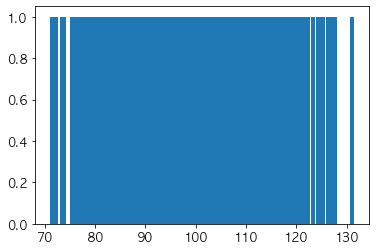

In [16]:
# 막대 그래프로 먼저 그려보자
plt.bar(a[0], a[1]) # x : 값, y : 수량 
plt.show()
# 개수를 세거나 수량의 가진 그래피는 큰 의미가 없다. 왜? 범주 값이 너무 많아서
# 이런 연속된 값은 묶어서 표현한다. 

(array([  9.,  42.,  97., 174., 224., 230., 140.,  56.,  22.,   6.]),
 array([ 71.37405696,  77.34639814,  83.31873932,  89.2910805 ,
         95.26342168, 101.23576286, 107.20810404, 113.18044522,
        119.1527864 , 125.12512758, 131.09746876]),
 <BarContainer object of 10 artists>)

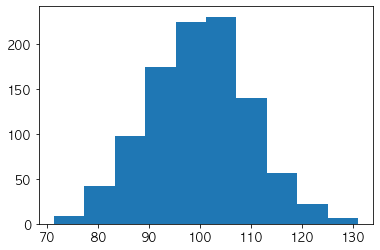

In [18]:
# 히스토그램으로 그려보자
plt.hist(a[0]) # 난수지정
# plt.show()

In [ ]:
array([  9.,  42.,  97., 174., 224., 230., 140.,  56.,  22.,   6.]), # 각 범주별 갯수 , 
array([ 71.37405696,  77.34639814,  83.31873932,  89.2910805 , 
     95.26342168, 101.23576286, 107.20810404, 113.18044522,
    119.1527864 , 125.12512758, 131.09746876]), # 각 구역 범위 min - max , 10개 구역으로 나눔 

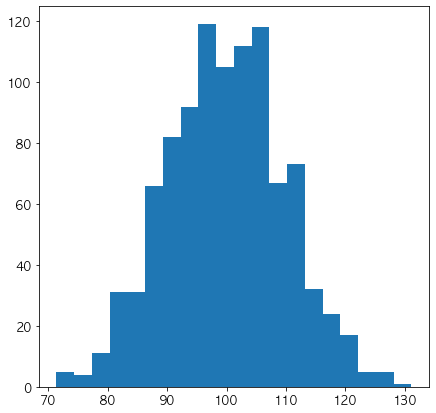

In [21]:
# 범주를 조절할수 있다? 구역을 지정해서 나누고 싶다면? bins , 20개 구역으로 나눠보자 ==> bins = 20 
# 범위를 많이 나누면 자세한 상황을 알수 있긴하다
plt.figure(figsize = (7,7))
plt.hist(a[0], bins = 20)
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [22]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [24]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### total_bill 의 분포를 시각화

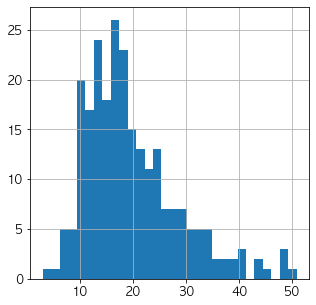

In [33]:
# 음식값에 따른 분포도 확인 
plt.figure(figsize = (5,5))
plt.hist(tips['total_bill'], bins = 30)
plt.grid(True)
plt.show()

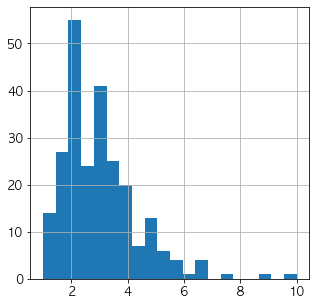

In [34]:
# 팁에 따른 분포도 확인
plt.figure(figsize = (5,5))
plt.hist(tips['tip'], bins = 20)
plt.grid(True)
plt.show()

<BarContainer object of 2 artists>

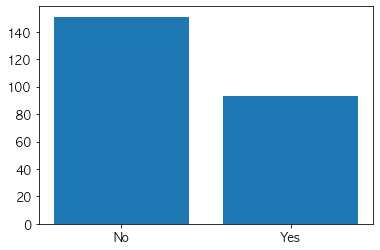

In [42]:
# smoker의 경우 y / N 범주다 --> 막대로 표현하는게 더 낫다. 
# plt.hist(tips['smoker'])
tips['smoker'].unique() # array(['No', 'Yes'], dtype=object)
data = tips['smoker'].value_counts()
plt.bar(data.index, data)

# ==========3교시 =======

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 값들의 중간값, 사분위수, 정상범위 내에서 최대/최소값, 극단값들을 보여주어 값들의 분포를 확인 할때 사용한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - 극단치 : 1사분위와 3사분위에서 $IQR(3사분위수-1사분위수) * whis$ 범위 이상 떨어진 값들

- 박스의 기준은? 사분위수로 분할하여 기준점들이 3개가 됨(1,2,3분위)
- 2분위의 값이 중앙값. 
- 박스의 밑에부분이 1분위
- 박스의 중앙부분이 2분위
- 박스의 위에부분이 3분위
- 그 범위 밖은 값을 이상치가 아닌 값중에 min, max값으로 
- 이상치가 있다 --> 데이터를 많이 모으면 된다. 문제는 데이터를 많이 모으는게 어렵다는거 
- IQR에 1.5를 곱했는데, 1.5를 whis로 값을 변경해도 된다. 
- 정상범위보다 좁히고 싶다. --> 값을 줄이면 된다. 정상범위보다 넓히고 싶다. --> 값을 늘린다. 
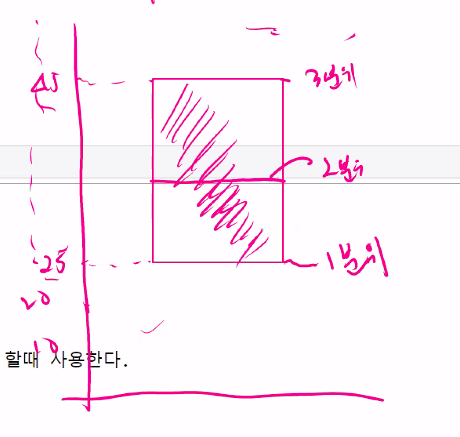

In [44]:
data = np.random.randint(1, 100, 1000) # 1~ 99사이의 1000개 정수 난수
data[:5] = [200, 250, -50, -100, -60] # 비정상범위도 넣어준다. 
data[:10]

array([ 200,  250,  -50, -100,  -60,   86,   98,   32,   83,   37])

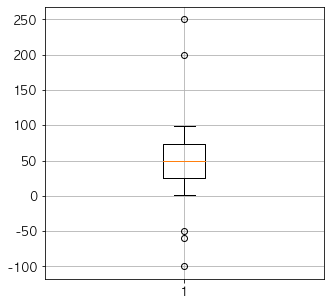

In [58]:
plt.figure(figsize = (5,5))

plt.boxplot(data)
# plt.boxplot(data, whis = 0.3) 
# whis 를 1.5(기본값)초과 값을 기입하면 정상 범위를 늘릴는 것 
# whis 를 1.5(기본값)미만 값을 기입하면 정상 범위를 줄이는 것 

# plt.boxplot(data, vert = False) # vert : True(수직방향,기본값) False(수평) 
 
#min, 1분위, 2분위, 3분위 max 값 표현할수 잇나? 


plt.grid(True)
plt.show()

In [ ]:
# A, B, C반의 점수 분포도를 비교하는데도 도움이 된다.  
plt.figure(figsize = (5,5))
plt.boxplot()

plt.grid(True)
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

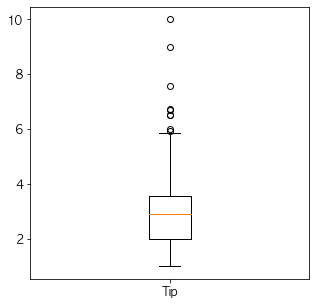

In [59]:
plt.figure(figsize = (5,5))
plt.boxplot(tips['tip'])
plt.xticks([1],['Tip'])
plt.show()

- 남녀별 tip의 분포글 하나의 boxplot에서 그려 분포 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

In [67]:
# 한 그래프 안에 박스플롯 2개로 하고 싶다면? 

male = tips[tips['sex'] == 'Male']['tip']
female = tips[tips['sex'] == 'Female']['tip']
male

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

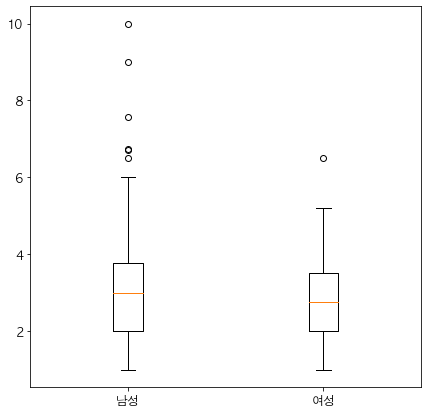

In [70]:
plt.figure(figsize = (7, 7))
plt.boxplot([male, female])
plt.xticks([1,2],['남성','여성'])
plt.show()